<a href="https://colab.research.google.com/github/tania-martynenko/KaggleX_Project/blob/main/Project_Part_I_Data%2BVisualizatiov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import warnings                                 # Used to ignore the warning given as output of the code
warnings.filterwarnings('ignore')

import numpy as np                              # Basic libraries of python for numeric and dataframe computations
import pandas as pd

import matplotlib.pyplot as plt                 # Basic library for data visualization
import seaborn as sns                           # Slightly advanced library for data visualization

from collections import defaultdict             # A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error  # A performance metrics in sklearn

In [74]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 40.9 MB/s eta 0:00:00


In [76]:
!pip install haversine

In [77]:
#Geographical moduls

from geopy.distance import geodesic
import geopandas as gpd

import contextily as ctx

from haversine import haversine, Unit
import missingno as mn
from shapely.geometry import Point
import seaborn as sns
from wordcloud import WordCloud


In [78]:
import os
import requests
import time

In [30]:
dt_report.shape

(166537, 43)

Dataset has 166 537 rows and 43 columns.

In [31]:
pd.set_option('display.max_columns', None) #Show all columns

In [32]:
dt_report = pd.read_csv ("/content/drive/MyDrive/KaggleX_Project/Data/Crash_Reporting_-_Drivers_Data.csv")

In [33]:
dt_report.head(2)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,05/31/2019 03:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 3215 SPARTAN RD,NaN,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,UNKNOWN,NaN,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,NaN,UNKNOWN,NaN,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,SUPERFICIAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,North,North,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,MCP1307000K,190024786,Montgomery County Police,Property Damage Crash,05/24/2019 05:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT,NaN,NaN,NaN,CLEAR,NaN,DAYLIGHT,NaN,NaN,NaN,6208FA7B-5DC4-4B54-AD60-0C06DFE2AE81,Yes,NO APPARENT INJURY,NaN,NOT DISTRACTED,XX,10239493-D667-42F9-A3D2-820FE184CB6C,FUNCTIONAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,Unknown,Unknown,0,No,No,0,UNK,UNK,NaN,39.199047,-77.250743,"(39.19904667, -77.25074333)"


In [34]:
dt_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166537 entries, 0 to 166536
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   166537 non-null  object 
 1   Local Case Number               166537 non-null  object 
 2   Agency Name                     166537 non-null  object 
 3   ACRS Report Type                166537 non-null  object 
 4   Crash Date/Time                 166537 non-null  object 
 5   Route Type                      150113 non-null  object 
 6   Road Name                       151081 non-null  object 
 7   Cross-Street Type               150082 non-null  object 
 8   Cross-Street Name               151070 non-null  object 
 9   Off-Road Description            15454 non-null   object 
 10  Municipality                    18458 non-null   object 
 11  Related Non-Motorist            5277 non-null    object 
 12  Collision Type  

Dataset has different data type, as float64 - 2 columns, int64 - 2 columns, object - 39 columns.

Checking dublicates and missing value:

In [238]:
#copy original dataset before procced modificatio
df = dt_report.copy()

In [43]:
df.shape

(166537, 43)

In [62]:
# Let's check for duplicate values in the data
df.duplicated().sum()

0

Dataset has 0 dublicates values.

<Axes: >

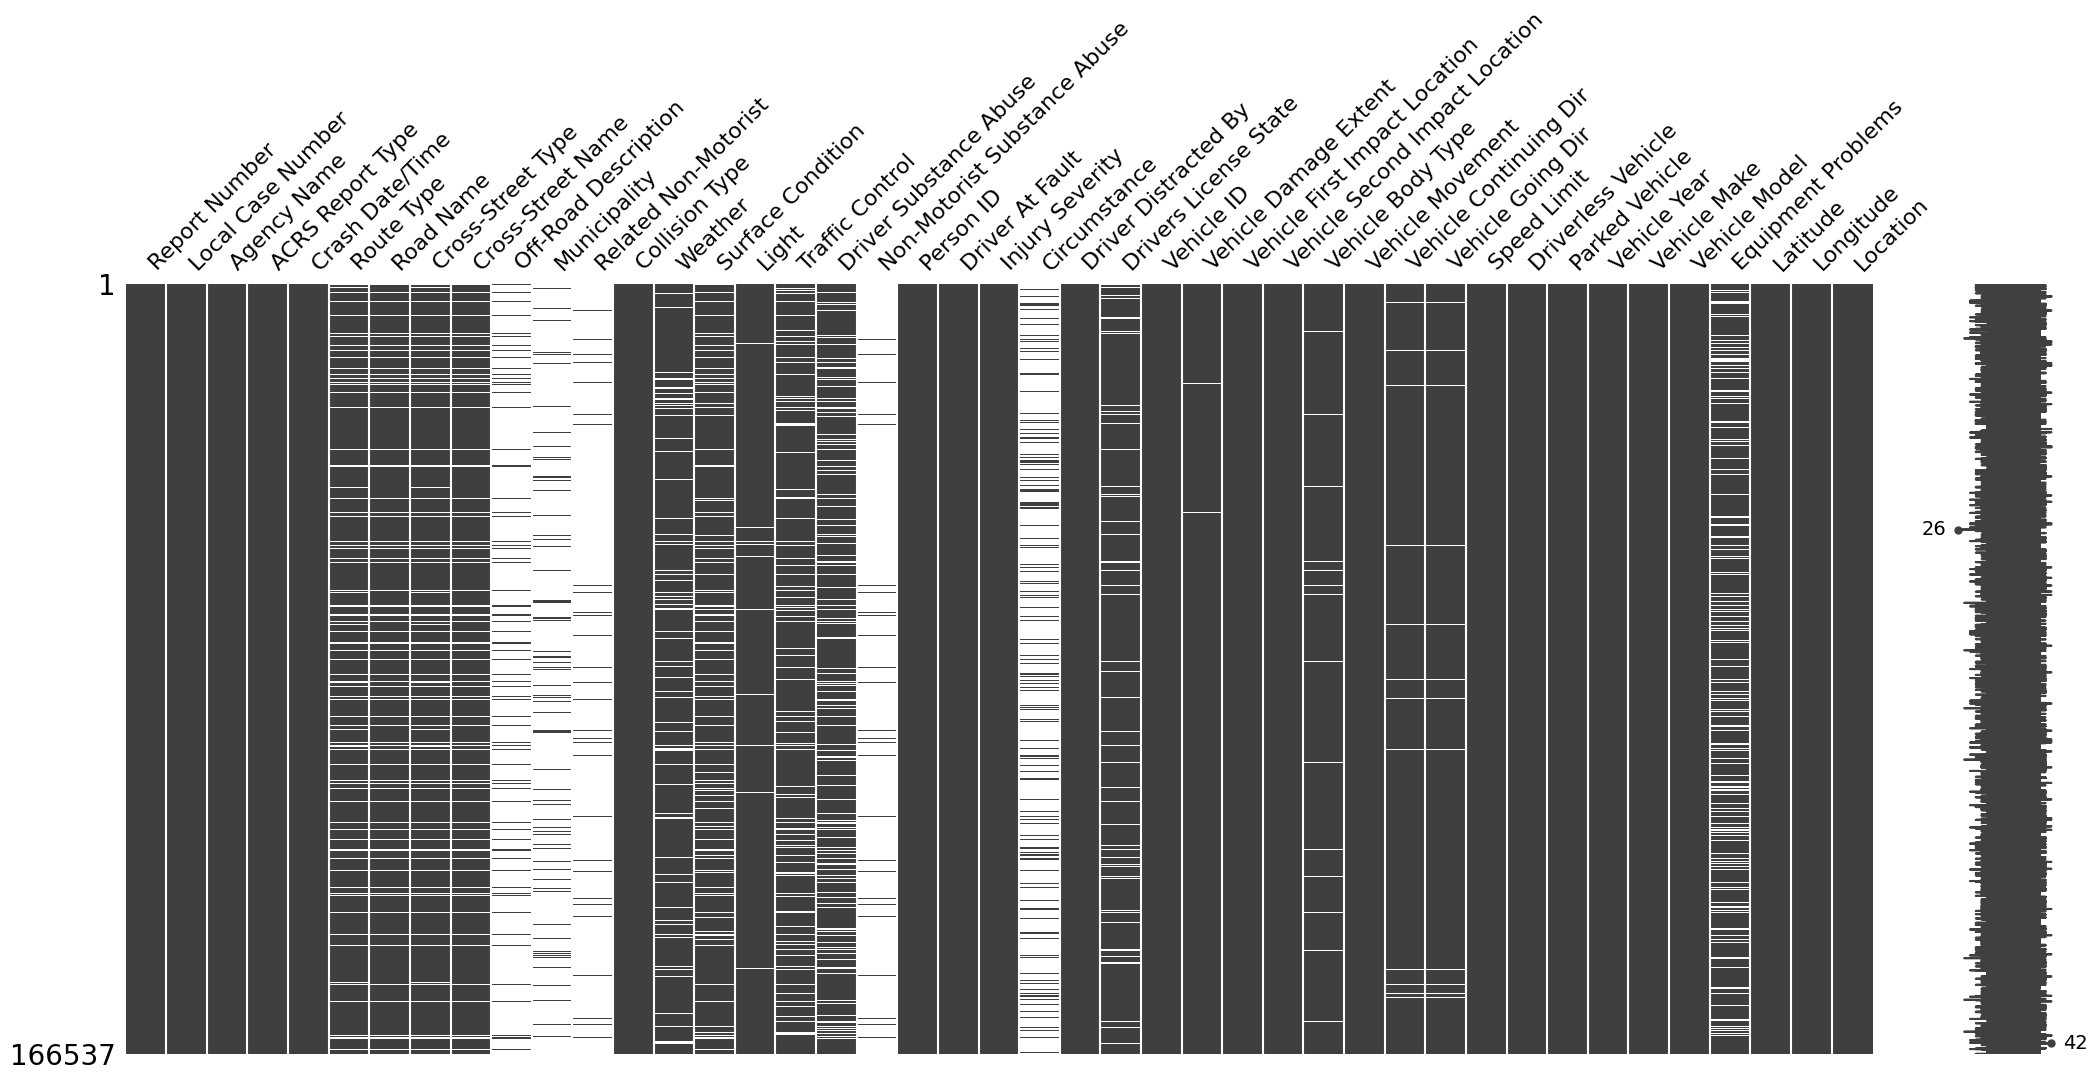

In [45]:
#Checking Missing Values Pattern in Dataframe
import missingno as mn
mn.matrix(df)

In [63]:
# Let's check for missing values in the data in %
print("Missing Value                      %: ")
round(df.isnull().sum() / df.isnull().count() * 100, 2)

Missing Value                      %: 


Report Number                      0.00
Local Case Number                  0.00
Agency Name                        0.00
ACRS Report Type                   0.00
Crash Date/Time                    0.00
Route Type                         9.86
Road Name                          9.28
Cross-Street Type                  9.88
Cross-Street Name                  9.29
Off-Road Description              90.72
Municipality                      88.92
Related Non-Motorist              96.83
Collision Type                     0.34
Weather                            7.77
Surface Condition                 11.72
Light                              0.83
Traffic Control                   14.88
Driver Substance Abuse            18.22
Non-Motorist Substance Abuse      97.50
Person ID                          0.00
Driver At Fault                    0.00
Injury Severity                    0.00
Circumstance                      81.77
Driver Distracted By               0.00
Drivers License State              5.71


In [40]:
#Drop rows where is related to NON-Motorist accident
#df.dropna(subset=['Related Non-Motorist'], inplace=True)


In [150]:
df.groupby('Related Non-Motorist').size()

Related Non-Motorist
BICYCLIST                       1134
BICYCLIST, OTHER                   4
BICYCLIST, PEDESTRIAN              3
IN ANIMAL-DRAWN VEH                1
MACHINE OPERATOR/RIDER            35
OTHER                            236
OTHER CONVEYANCE                  83
OTHER CONVEYANCE, PEDESTRIAN       1
OTHER PEDALCYCLIST                23
OTHER, OTHER CONVEYANCE            1
OTHER, PEDESTRIAN                  8
PEDESTRIAN                      3748
dtype: int64

In [239]:
df = df[df['Related Non-Motorist'].isnull()] #drop rows related to non-motorist accedent

In [240]:
df.drop('Related Non-Motorist', axis=1, inplace=True)

In [241]:
df.drop('Non-Motorist Substance Abuse', axis=1, inplace=True)

### Drop columns with missing value 75%

In [242]:
# Persentage of Missing Value:

missing_values = df.isna().sum().sort_values(ascending=False)

missing_percentage = missing_values[missing_values!=0]/len(df)*100
#Dropping Columns with missing value gretter that 75%
columns_to_drop = missing_percentage[missing_percentage >= 75].index
print("Dropping columns with missing value gretter than 75% :", columns_to_drop)
df.drop(columns=columns_to_drop, inplace=True)

#print("Percentage of Missing Values \n", missing_percentage)

Dropping columns with missing value gretter than 75% : Index(['Off-Road Description', 'Municipality', 'Circumstance'], dtype='object')


In [179]:
# Let's check for missing values in the data in %
print("Missing Value                      %: ")
round(df.isnull().sum() / df.isnull().count() * 100, 2)

Missing Value                      %: 


Report Number                      0.00
Local Case Number                  0.00
Agency Name                        0.00
ACRS Report Type                   0.00
Crash Date/Time                    0.00
Route Type                         9.45
Road Name                          8.89
Cross-Street Type                  9.47
Cross-Street Name                  8.90
Collision Type                     0.25
Weather                            7.75
Surface Condition                 11.33
Light                              0.83
Traffic Control                   14.90
Driver Substance Abuse            18.23
Person ID                          0.00
Driver At Fault                    0.00
Injury Severity                    0.00
Driver Distracted By               0.00
Drivers License State              5.54
Vehicle ID                         0.00
Vehicle Damage Extent              0.16
Vehicle First Impact Location      0.09
Vehicle Second Impact Location     0.15
Vehicle Body Type                  1.37


Observation:
Let's address the columns with the highest missing data percentages:
- Equipment Problems: 20.02% missing
- Driver Substance Abuse: 18.23% missing
- Traffic Control: 14.90% missing
- Surface Condition: 11.33% missing
- Route Type, Road Name, Cross-Street Type, Cross-Street Name: Approximately 9% missing

Let's handle these missing values for futher analysis.

 Categorical Columns
categorical_columns = [
    'Route Type', 'Road Name', 'Cross-Street Type', 'Cross-Street Name',
    'Collision Type', 'Weather', 'Surface Condition', 'Light',
    'Traffic Control', 'Driver Substance Abuse', 'Drivers License State',
    'Vehicle Damage Extent', 'Vehicle First Impact Location',
    'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement',
    'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Vehicle Make',
    'Vehicle Model', 'Equipment Problems']

for col in categorical_columns:
    df[col].fillna('Unknown', inplace=True)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161260 entries, 0 to 166536
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   161260 non-null  object 
 1   Local Case Number               161260 non-null  object 
 2   Agency Name                     161260 non-null  object 
 3   ACRS Report Type                161260 non-null  object 
 4   Crash Date/Time                 161260 non-null  object 
 5   Route Type                      146016 non-null  object 
 6   Road Name                       146916 non-null  object 
 7   Cross-Street Type               145986 non-null  object 
 8   Cross-Street Name               146906 non-null  object 
 9   Collision Type                  160859 non-null  object 
 10  Weather                         148755 non-null  object 
 11  Surface Condition               142995 non-null  object 
 12  Light           

Observation:
Afrer data cleaning and handeling missing value dataset has  **____rows** and **___ columns**, data type :  float64 -2 columns, int64 - 2 columns, object type - 34 clumns.

### Modifying data format

In [181]:
df.head(2)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Person ID,Driver At Fault,Injury Severity,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,05/31/2019 03:00:00 PM,NaN,NaN,NaN,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,UNKNOWN,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,UNKNOWN,NaN,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,SUPERFICIAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,North,North,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,MCP1307000K,190024786,Montgomery County Police,Property Damage Crash,05/24/2019 05:00:00 PM,NaN,NaN,NaN,NaN,NaN,CLEAR,NaN,DAYLIGHT,NaN,NaN,6208FA7B-5DC4-4B54-AD60-0C06DFE2AE81,Yes,NO APPARENT INJURY,NOT DISTRACTED,XX,10239493-D667-42F9-A3D2-820FE184CB6C,FUNCTIONAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,Unknown,Unknown,0,No,No,0,UNK,UNK,NaN,39.199047,-77.250743,"(39.19904667, -77.25074333)"


In [243]:
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'])

In [244]:
df['Weekday?'] = df['Crash Date/Time'].dt.day_name().apply(lambda x: 'weekend' if x in ['Saturday', 'Sunday'] else 'weekday')

In [245]:
df['Crash Time'] = df['Crash Date/Time'].dt.time

In [246]:
df['Crash Date'] = df['Crash Date/Time'].dt.date

In [247]:
df.head(2)


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Person ID,Driver At Fault,Injury Severity,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,Weekday?,Crash Time,Crash Date
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,2019-05-31 15:00:00,NaN,NaN,NaN,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,UNKNOWN,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,UNKNOWN,NaN,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,SUPERFICIAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,North,North,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)",weekday,15:00:00,2019-05-31
1,MCP1307000K,190024786,Montgomery County Police,Property Damage Crash,2019-05-24 17:00:00,NaN,NaN,NaN,NaN,NaN,CLEAR,NaN,DAYLIGHT,NaN,NaN,6208FA7B-5DC4-4B54-AD60-0C06DFE2AE81,Yes,NO APPARENT INJURY,NOT DISTRACTED,XX,10239493-D667-42F9-A3D2-820FE184CB6C,FUNCTIONAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,Unknown,Unknown,0,No,No,0,UNK,UNK,NaN,39.199047,-77.250743,"(39.19904667, -77.25074333)",weekday,17:00:00,2019-05-24


In [248]:
df.drop('Crash Date/Time', axis=1, inplace=True)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161260 entries, 0 to 166536
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   161260 non-null  object 
 1   Local Case Number               161260 non-null  object 
 2   Agency Name                     161260 non-null  object 
 3   ACRS Report Type                161260 non-null  object 
 4   Route Type                      146016 non-null  object 
 5   Road Name                       146916 non-null  object 
 6   Cross-Street Type               145986 non-null  object 
 7   Cross-Street Name               146906 non-null  object 
 8   Collision Type                  160859 non-null  object 
 9   Weather                         148755 non-null  object 
 10  Surface Condition               142995 non-null  object 
 11  Light                           159923 non-null  object 
 12  Traffic Control 

In [249]:
df.groupby('Collision Type').size() #Collision Type has 0.25 % Missing Value

Collision Type
ANGLE MEETS LEFT HEAD ON          683
ANGLE MEETS LEFT TURN            1932
ANGLE MEETS RIGHT TURN           1154
HEAD ON                          3592
HEAD ON LEFT TURN               12373
OPPOSITE DIR BOTH LEFT TURN       306
OPPOSITE DIRECTION SIDESWIPE     2770
OTHER                           16157
SAME DIR BOTH LEFT TURN           690
SAME DIR REAR END               53937
SAME DIR REND LEFT TURN           711
SAME DIR REND RIGHT TURN          708
SAME DIRECTION LEFT TURN         3563
SAME DIRECTION RIGHT TURN        3654
SAME DIRECTION SIDESWIPE        15562
SINGLE VEHICLE                  13746
STRAIGHT MOVEMENT ANGLE         28632
UNKNOWN                           689
dtype: int64

In [270]:
df['Collision Type'].isnull().sum()

401

In [271]:
df['Collision Type'].fillna('UNKNOWN', inplace=True)

In [250]:
df.groupby('Injury Severity').size() #Has 0 missing value

Injury Severity
FATAL INJURY                   150
NO APPARENT INJURY          131459
POSSIBLE INJURY              16818
SUSPECTED MINOR INJURY       11471
SUSPECTED SERIOUS INJURY      1362
dtype: int64

In [251]:
df.groupby('Driver Distracted By').size()

Driver Distracted By
ADJUSTING AUDIO AND OR CLIMATE CONTROLS                 127
BY MOVING OBJECT IN VEHICLE                             202
BY OTHER OCCUPANTS                                      388
DIALING CELLULAR PHONE                                   44
DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT            892
EATING OR DRINKING                                      192
INATTENTIVE OR LOST IN THOUGHT                         4070
LOOKED BUT DID NOT SEE                                19150
NO DRIVER PRESENT                                       256
NOT DISTRACTED                                       101395
OTHER CELLULAR PHONE RELATED                            351
OTHER DISTRACTION                                      3044
OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)       316
SMOKING RELATED                                          25
TALKING OR LISTENING TO CELLULAR PHONE                  260
TEXTING FROM A CELLULAR PHONE                            64
UNKNOWN            

In [252]:
def regroup_distracted_by(value):
    phone_related = ["DIALING CELLULAR PHONE", "OTHER CELLULAR PHONE RELATED",
                     "TALKING OR LISTENING TO CELLULAR PHONE", "TEXTING FROM A CELLULAR PHONE"]

    in_vehicle_distractions = ["ADJUSTING AUDIO AND OR CLIMATE CONTROLS", "BY MOVING OBJECT IN VEHICLE",
                               "BY OTHER OCCUPANTS", "EATING OR DRINKING", "OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)",
                               "SMOKING RELATED", "USING DEVICE OBJECT BROUGHT INTO VEHICLE",
                               "USING OTHER DEVICE CONTROLS INTEGRAL TO VEHICLE"]

    external_distractions = ["DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT", "LOOKED BUT DID NOT SEE"]

    mental_distractions = ["INATTENTIVE OR LOST IN THOUGHT"]

    if value in phone_related:
        return "Phone Distractions"
    elif value in in_vehicle_distractions:
        return "In-vehicle Distractions"
    elif value in external_distractions:
        return "External Distractions"
    elif value in mental_distractions:
        return "Mental Distractions"
    elif value == "NOT DISTRACTED":
        return "NOT DISTRACTED"
    elif value == "NO DRIVER PRESENT":
        return "NO DRIVER PRESENT"
    else:
        return "Others"

df['Driver Distracted Group'] = df['Driver Distracted By'].apply(regroup_distracted_by)


In [253]:
df.groupby('Driver Distracted Group').size()

Driver Distracted Group
External Distractions       20042
In-vehicle Distractions      1398
Mental Distractions          4070
NO DRIVER PRESENT             256
NOT DISTRACTED             101395
Others                      33380
Phone Distractions            719
dtype: int64

In [254]:
df.groupby('Route Type').size() # Route Type has 9.45% Missing Value

Route Type
County                  51851
Government                578
Interstate (State)       3055
Maryland (State)        73082
Municipality             8644
Other Public Roadway     1049
Ramp                      545
Service Road               39
US (State)               7153
Unknown                    20
dtype: int64

In [255]:
 df.groupby('Driver Substance Abuse').size()

Driver Substance Abuse
ALCOHOL CONTRIBUTED             1384
ALCOHOL PRESENT                 3925
COMBINATION CONTRIBUTED           45
COMBINED SUBSTANCE PRESENT        87
ILLEGAL DRUG CONTRIBUTED          96
ILLEGAL DRUG PRESENT             249
MEDICATION CONTRIBUTED            62
MEDICATION PRESENT               112
NONE DETECTED                 114957
OTHER                             57
UNKNOWN                        10889
dtype: int64

In [257]:
def regroup_substance_abuse(value):
    alcohol_related = ["ALCOHOL CONTRIBUTED", "ALCOHOL PRESENT"]

    illigal_drug_related = ["ILLEGAL DRUG CONTRIBUTED", "ILLEGAL DRUG PRESENT"]

    medical_drugs  =  ["MEDICATION CONTRIBUTED", "MEDICATION PRESENT"]

    combined_substance = ["COMBINATION CONTRIBUTED", "COMBINED SUBSTANCE PRESENT"]

    if value in alcohol_related:
        return "Alcohol"
    elif value in illigal_drug_related:
        return "Drugs"
    elif value in medical_drugs:
        return "Medication"
    elif value in combined_substance:
        return "Combined Substance"
    elif value == "NONE DETECTED":
        return "None Detected"
    elif value == "OTHER":
        return "Other"
    elif value == "UNKNOWN":
      return "Unknown"
df['Driver Substance Abuse'] = df['Driver Substance Abuse'].apply(regroup_substance_abuse)


In [258]:
df.groupby('Driver Substance Abuse').size()

Driver Substance Abuse
Alcohol                 5309
Combined Substance       132
Drugs                    345
Medication               174
None Detected         114957
Other                     57
Unknown                10889
dtype: int64

In [259]:
df['Driver Substance Abuse'].isnull().sum()

29397

In [260]:
df['Driver Substance Abuse'].fillna('Unknown', inplace=True)

In [261]:
df.groupby('Equipment Problems').size()

Equipment Problems
AIR BAG FAILED            164
BELT(S) MISUSED            31
BELTS/ANCHORS BROKE        11
FACING WRONG WAY            5
NO MISUSE              115743
NOT STREPPED RIGHT          3
OTHER                     108
SIZE/TYPE IMPROPER          2
STRAP/TETHER LOOSE          8
UNKNOWN                 12905
dtype: int64

In [262]:
df['Equipment Problems'].isnull().sum()

32280

In [263]:
df['Equipment Problems'].fillna('UNKNOWN', inplace=True)

In [267]:
df.groupby('Driver At Fault').size()

Driver At Fault
No         71101
Unknown     4088
Yes        86071
dtype: int64

In [268]:
df['Driver At Fault'].isnull().sum()

0

In [266]:
df.head(2)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Person ID,Driver At Fault,Injury Severity,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,Weekday?,Crash Time,Crash Date,Driver Distracted Group
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,NaN,NaN,NaN,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,Unknown,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,UNKNOWN,NaN,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,SUPERFICIAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,North,North,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)",weekday,15:00:00,2019-05-31,Others
1,MCP1307000K,190024786,Montgomery County Police,Property Damage Crash,NaN,NaN,NaN,NaN,NaN,CLEAR,NaN,DAYLIGHT,NaN,Unknown,6208FA7B-5DC4-4B54-AD60-0C06DFE2AE81,Yes,NO APPARENT INJURY,NOT DISTRACTED,XX,10239493-D667-42F9-A3D2-820FE184CB6C,FUNCTIONAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,Unknown,Unknown,0,No,No,0,UNK,UNK,UNKNOWN,39.199047,-77.250743,"(39.19904667, -77.25074333)",weekday,17:00:00,2019-05-24,NOT DISTRACTED


### Geographical data